In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import os
import numpy as np

In [4]:
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
# The GPU id to use, "0" to  "7"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
# # CUDA_LAUNCH_BLOCKING=1
# # os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

In [5]:
# !rm -rf pytorch-lib
# !git clone https://github.com/woolly-of-cv/pytorch-lib.git

In [6]:
import sys
sys.path.append(os.path.join(os.getcwd(), "pytorch-lib/"))
# print(sys.path)

In [7]:
from woollylib import main
from woollylib.utils.utils import get_device

In [8]:
batch_size = 256
ricap_beta = 0.3

clist = "ABACUS, ACADEMIC_GOWN, ACORN, AFRICAN_ELEPHANT, ALBATROSS, ALP, ALTAR, AMERICAN_ALLIGATOR, AMERICAN_LOBSTER, APRON, ARABIAN_CAMEL, BABOON, BACKPACK, BANANA, BANNISTER, BARBERSHOP, BARN, BARREL, BASKETBALL, BATHTUB, BEACH_WAGON, BEACON, BEAKER, BEE, BEER_BOTTLE, BELL_PEPPER, BIGHORN, BIKINI, BINOCULARS, BIRDHOUSE, BISON, BLACK_STORK, BLACK_WIDOW, BOA_CONSTRICTOR, BOW_TIE, BRAIN_CORAL, BRASS, BROOM, BROWN_BEAR, BUCKET, BULLET_TRAIN, BULLFROG, BUTCHER_SHOP, CANDLE, CANNON, CARDIGAN, CASH_MACHINE, CAULIFLOWER, CD_PLAYER, CENTIPEDE, CHAIN, CHEST, CHIHUAHUA, CHIMPANZEE, CHRISTMAS_STOCKING, CLIFF, CLIFF_DWELLING, COCKROACH, COMIC_BOOK, COMPUTER_KEYBOARD, CONFECTIONERY, CONVERTIBLE, CORAL_REEF, COUGAR, CRANE, DAM, DESK, DINING_TABLE, DRAGONFLY, DRUMSTICK, DUGONG, DUMBBEL, EGYPTIAN_CAT, ESPRESSO, EUROPEAN_FIRE_SALAMANDER, FLAGPOLE, FLY, FOUNTAIN, FREIGHT_CAR, FRYING_PAN, FUR_COAT, GASMASK, GAZELLE, GERMAN_SHEPHERD, GO-KART, GOLDEN_RETRIEVER, GOLDFISH, GONDOLA, GOOSE, GRASSHOPPER, GUACAMOLE, GUINEA_PIG, HOG, HOURGLASS, ICE_CREAM, ICE_LOLLY, IPOD, JELLYFISH, JINRIKISHA, KIMONO, KING_PENGUIN, KOALA, LABRADOR_RETRIEVER, LADYBUG, LAKESIDE, LAMPSHADE, LAWN_MOWER, LEMON, LESSER_PANDA, LIFEBOAT, LIMOUSINE, LION, MAGNETIC_COMPASS, MANTIS, MASHED_POTATO, MAYPOLE, MEAT_LOAF, MILITARY_UNIFORM, MINISKIRT, MONARCH, MOVING_VAN, MUSHROOM, NAIL, NECK_BRACE, OBELISK, OBOE, ORANGE, ORANGUTAN, ORGAN, OX, PARKING_METER, PAY-PHONE, PERSIAN_CAT, PICKET_FENCE, PILL_BOTTLE, PIZZA, PLATE, PLUNGER, POLE, POLICE_VAN, POMEGRANATE, PONCHO, POP_BOTTLE, POTPIE, POTTER'S_WHEEL, PRETZEL, PROJECTILE, PUNCHING_BAG, REEL, REFRIGERATOR, REMOTE_CONTROL, ROCKING_CHAIR, RUGBY_BALL, SANDAL, SCHOOL_BUS, SCOREBOARD, SCORPION, SEASHORE, SEA_CUCUMBER, SEA_SLUG, SEWING_MACHINE, SLUG, SNAIL, SNORKEL, SOCK, SOMBRERO, SPACE_HEATER, SPIDER_WEB, SPINY_LOBSTER, SPORTS_CAR, STANDARD_POODLE, STEEL_ARCH_BRIDGE, STOPWATCH, SULPHUR_BUTTERFLY, SUNGLASSES, SUSPENSION_BRIDGE, SWIMMING_TRUNKS, SYRINGE, TABBY, TAILED_FROG, TARANTULA, TEAPOT, TEDDY, THATCH, TORCH, TRACTOR, TRILOBITE, TRIUMPHAL_ARCH, TROLLEYBUS, TURNSTILE, UMBRELLA, VESTMENT, VIADUCT, VOLLEYBALL, WALKING_STICK, WATER_JUG, WATER_TOWER, WOK, WOODEN_SPOON, YORKSHIRE_TERRIER".split(', ')

class_map = dict(zip(clist, range(len(clist))))

# Enable or disable visualizations
show_summary = True
show_dataset_analyze = True

In [9]:
use_cuda, device = get_device()

In [10]:
from woollylib.utils.transform import BASE_PROFILE, get_transform # Get transforme functions

# Imagenet stats
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_profile = {
    'normalize': BASE_PROFILE['normalize'],
    'shift_scale_rotate': BASE_PROFILE['shift_scale_rotate'],
#     'rotate': BASE_PROFILE['rotate'],
    'pad_and_crop': BASE_PROFILE['pad_and_crop'],
#     'crop_and_pad': BASE_PROFILE['crop_and_pad'],
    'random_brightness_contrast': BASE_PROFILE['random_brightness_contrast'],
    'horizontal_flip': BASE_PROFILE['horizontal_flip'],
#     'to_gray': BASE_PROFILE['to_gray'],
    'coarse_dropout': BASE_PROFILE['coarse_dropout'],
    'to_tensor':  BASE_PROFILE['to_tensor'],
}

train_profile['normalize']['mean'] = mean
train_profile['normalize']['std'] = std

train_profile['shift_scale_rotate']['rotate_limit'] = 7
train_profile['shift_scale_rotate']['p'] = 0.5

train_profile['pad_and_crop']['pad'] = 6
train_profile['pad_and_crop']['p'] = 1.0
train_profile['pad_and_crop']['height'] = 64
train_profile['pad_and_crop']['width'] = 64
train_profile['pad_and_crop']['fill'] = mean

# train_profile['rotate']['limit'] = 5
# train_profile['rotate']['p'] = 1.0

train_profile['coarse_dropout']['min_height'] = 16
train_profile['coarse_dropout']['min_width'] = 16
train_profile['coarse_dropout']['p'] = 1.0
train_profile['coarse_dropout']['max_height'] = 32
train_profile['coarse_dropout']['max_width'] = 32
train_profile['coarse_dropout']['fill_value'] = mean

normalize = {
    'normalize': BASE_PROFILE['normalize'],
    'to_tensor':  BASE_PROFILE['to_tensor'],
}

normalize['normalize']['mean'] = mean
normalize['normalize']['std'] = std

course_dropout = {
    'coarse_dropout': BASE_PROFILE['coarse_dropout'],
}

ricap_profile = {
    'p': 0.3,
    'ricap_beta': ricap_beta
}

from woollylib.dataset.tiny_imagenet.dataset import get_loader

train_loader, test_loader = get_loader(get_transform(train_profile), get_transform(normalize), batch_size=batch_size, use_cuda=use_cuda)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

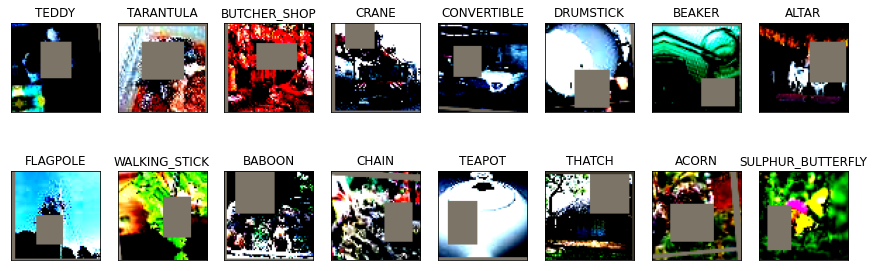

In [11]:
from woollylib.main import get_samples_visualize
get_samples_visualize(show_dataset_analyze, train_loader, class_map)

In [12]:
# from woollylib.bp.vanila.backpropagation import train, test
from woollylib.bp.autocast.backpropagation import train, test
# from woollylib.bp.ricap.backpropagation import train_ricap

epochs = 35
lr = 0.05
max_lr = 0.5
steps_per_epoch = len(train_loader)
dropout = False
drop_ratio = 0.1
use_l1 = False
lambda_l1 = 1e-5
min_momentum = 0.9
momentum = 0.9
weight_decay = 0.0001
weight_decay = weight_decay # / batch_size

train_function=train
test_function=test

print("Using Device:", device)
print("Epochs:", epochs)
print("Lr:", lr)
print("Max Lr:", max_lr)
print("Batch Size:", batch_size)
print("Dropout:", dropout)
print("Dropout Ratio:", drop_ratio)
print("Momentum:", momentum)
print("Weight Decay:", weight_decay)
print("Use L1:", use_l1)
print("L1 Lambda:", lambda_l1)
print("RICAP Beta", ricap_beta)

Using Device: cuda
Epochs: 35
Lr: 0.05
Max Lr: 0.5
Batch Size: 256
Dropout: False
Dropout Ratio: 0.1
Momentum: 0.9
Weight Decay: 0.0001
Use L1: False
L1 Lambda: 1e-05
RICAP Beta 0.3


In [13]:
from woollylib.utils.utils import initialize_weights, print_summary, print_modal_summary
# from woollylib.models.custom.custom_resnet import CustomResNet
# from woollylib.models.resnet import ResNet18
# from woollylib.models.model import WyCifar10Net
from woollylib.models.custom.wytiny import WyTiny

# Batch Normalization Technique to be used
norm='bn'
use1x1=True
ctype='vanila'
base_channels=32
repetations=1
usedilation=False
use_skip=True
classes=200
blocks_count=3

# Create model instance based on parameter which one to use
# model = CustomResNet(norm=norm, ctype=ctype).to(device)
# model = ResNet18(norm=norm, ctype=ctype, classes=200).to(device)

model = WyTiny(
    image=(64, 64),
    classes=classes,
    ctype=ctype, 
    use1x1=use1x1, 
    base_channels=base_channels, 
    layers=repetations, 
    drop_ratio=drop_ratio, 
    usedilation=usedilation, 
    use_skip=use_skip,
    blocks_count=blocks_count,
    norm=norm
).apply(initialize_weights).to(device)

if show_summary:
    print_summary(model, input_size=(3, 64, 64))
#     print_modal_summary(model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
          WyConv2d-2           [-1, 64, 64, 64]               0
       BatchNorm2d-3           [-1, 64, 64, 64]             128
            Conv2d-4           [-1, 64, 64, 64]          36,864
          WyConv2d-5           [-1, 64, 64, 64]               0
       BatchNorm2d-6           [-1, 64, 64, 64]             128
        WyResidual-7           [-1, 64, 64, 64]               0
            Conv2d-8          [-1, 128, 64, 64]          73,728
          WyConv2d-9          [-1, 128, 64, 64]               0
        MaxPool2d-10          [-1, 128, 32, 32]               0
      BatchNorm2d-11          [-1, 128, 32, 32]             256
             ReLU-12          [-1, 128, 32, 32]               0
           Conv2d-13          [-1, 128, 32, 32]         147,456
         WyConv2d-14          [-1, 128,

In [14]:
# # Print Model
# from torchviz import make_dot
# import torch
# x = torch.zeros(1, 3, 64, 64, dtype=torch.float, requires_grad=False, device=device)
# out = model(x)
# make_dot(out)

In [15]:
# https://netron.app/
import torch
x = torch.zeros(1, 3, 64, 64, dtype=torch.float, requires_grad=False, device=device)
torch.onnx.export(model, x, "wytiny.onnx")

In [16]:
# from woollylib.main import get_optimizer
# from torch_lr_finder import LRFinder

# optimizer, criteria = get_optimizer(model, 0.001, momentum, weight_decay, device)

# lr_finder = LRFinder(model, optimizer, criteria, device=device)
# lr_finder.range_test(train_loader, val_loader=test_loader, end_lr=2, num_iter=100, step_mode="linear")
# lr_finder.plot(log_lr=False)
# lr_finder.reset()

In [17]:
from woollylib.main import get_optimizer, get_scheduler
from torch.cuda.amp import GradScaler

scaler = GradScaler()
ctrain = train_function(use_l1=use_l1, lambda_l1=lambda_l1)

optimizer, criteria = get_optimizer(model, max_lr, momentum, weight_decay, device)
scheduler = get_scheduler(epochs, lr, max_lr, min_momentum, momentum, optimizer, steps_per_epoch)

from woollylib.training import Training
# Create instance of trainer with all params
trainer = Training(
    model,
    optimizer,
    criteria,
    scheduler,
    ctrain,
    test_function,
    train_loader,
    test_loader,
    lr,
    epochs,
    device,
    dropout,
    scaler
)

# Run trainer
trainer.run()

-------------------------------------------------------------------------
| Epoch | LR       | Time    | TrainLoss | TrainAcc | ValLoss  | ValAcc |
-------------------------------------------------------------------------
|     1 | 0.050000 | 02m 52s | 5.124486  | 3.68   % | 4.802895 | 7.36 % |
|     2 | 0.114286 | 02m 54s | 4.561897  | 11.8   % | 4.305923 | 17.4 % |
|     3 | 0.178571 | 02m 55s | 4.207659  | 19.99  % | 7.936950 | 11.88% |
|     4 | 0.242857 | 02m 53s | 3.979765  | 25.83  % | 3.874291 | 29.59% |
|     5 | 0.307143 | 02m 51s | 3.80764   | 30.54  % | 3.764124 | 32.92% |
|     6 | 0.371429 | 02m 29s | 3.688343  | 33.93  % | 3.584536 | 37.83% |
|     7 | 0.435714 | 01m 57s | 3.601112  | 36.31  % | 3.664649 | 34.5 % |
|     8 | 0.500000 | 01m 57s | 3.542035  | 38.04  % | 3.517482 | 39.1 % |
|     9 | 0.482187 | 01m 57s | 3.457671  | 40.7   % | 3.343736 | 43.52% |
|    10 | 0.464375 | 02m 08s | 3.391414  | 42.61  % | 3.446750 | 42.62% |
|    11 | 0.446562 | 02m 21s | 3.33540

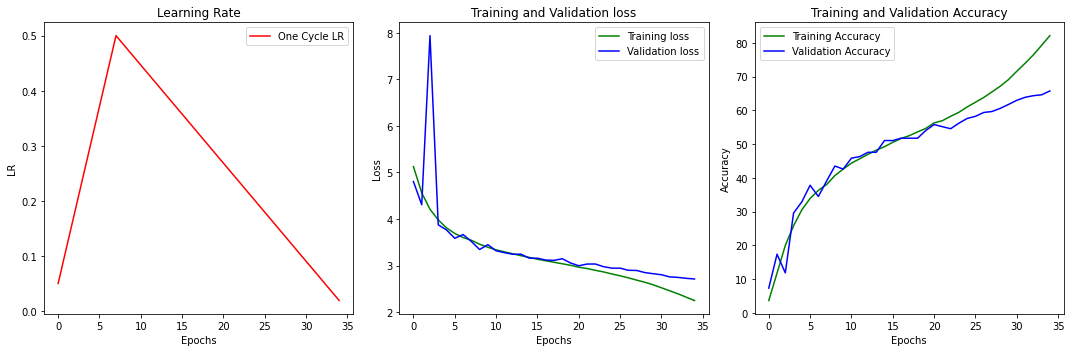

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Total Incorrect Predictions 3423


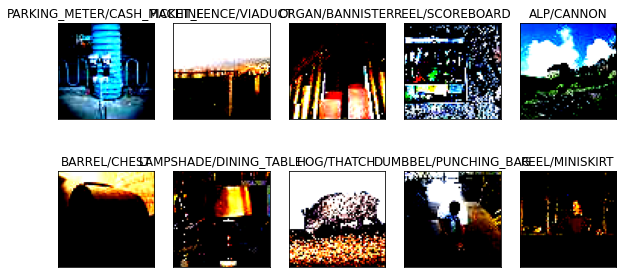

In [18]:
# Visualize network performance

from woollylib.utils.visualize import plot_network_performance
from woollylib.utils.utils import get_incorrrect_predictions
from woollylib.utils.visualize import plot_incorrect_predictions

from woollylib.utils.utils import get_all_predictions, get_incorrrect_predictions, prepare_confusion_matrix
from woollylib.utils.visualize import plot_confusion_matrix


# trainer.print_best_model()
plot_network_performance(epochs, trainer.schedule, trainer.list_train_loss, trainer.list_valid_loss, trainer.list_train_correct, trainer.list_valid_correct)

# all_preds, all_targets = get_all_predictions(trainer.model, test_loader, device)
# confusion_matrix = prepare_confusion_matrix(all_preds, all_targets, class_map)
# plot_confusion_matrix(confusion_matrix, class_map, False)

incorrect = get_incorrrect_predictions(trainer.model, test_loader, device)
plot_incorrect_predictions(incorrect, class_map)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

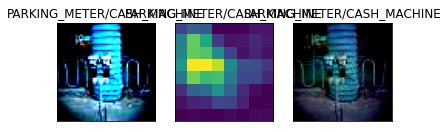

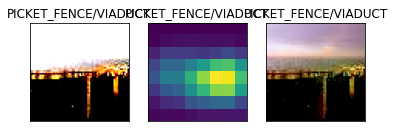

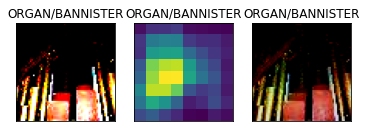

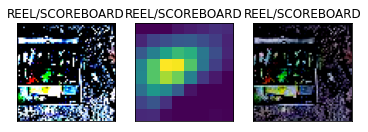

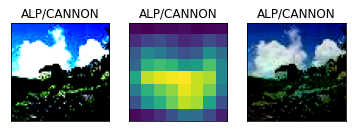

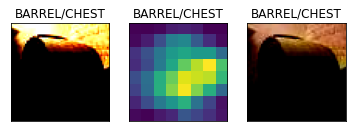

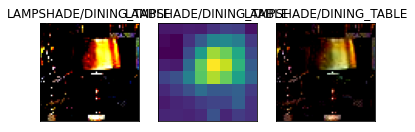

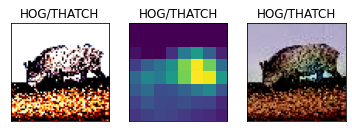

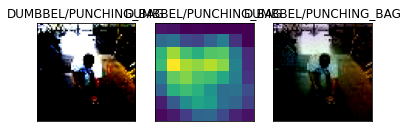

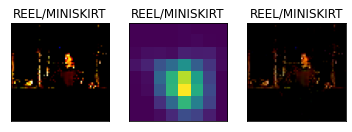

In [19]:
from woollylib.utils.gradcam.compute import compute_gradcam

count = 10
for i, (image, label, pred, output) in enumerate(incorrect):
    compute_gradcam(model, class_map, image, label, pred, device=device)
    if i == count-1:
        break